<a href="https://colab.research.google.com/github/joshuaghannan/ECEC247_Project/blob/jgh_tests/Dataset_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
########################################################

# If running with Google Colab

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
########################################################

# If running with Google Colab
# Create a folder "C247" and then store the project datasets within that folder
# Check that your datasets are setup correctly

!ls "/content/gdrive/My Drive/C247" # File path

EEG_loading.ipynb	PyTorch_Experiments.ipynb  y_test.npy
person_test.npy		X_test.npy		   y_train_valid.npy
person_train_valid.npy	X_train_valid.npy


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Datasets

In [0]:
# X_test = np.load("X_test.npy")
# y_test = np.load("y_test.npy")
# person_train_valid = np.load("person_train_valid.npy")
# X_train_valid = np.load("X_train_valid.npy")
# y_train_valid = np.load("y_train_valid.npy")
# person_test = np.load("person_test.npy")

# Change if your directory is different
dataset_path = "/content/gdrive/My Drive/C247/" 

X_test = np.load(dataset_path + "X_test.npy")
y_test = np.load(dataset_path + "y_test.npy")
person_train_valid = np.load(dataset_path + "person_train_valid.npy")
X_train_valid = np.load(dataset_path + "X_train_valid.npy")
y_train_valid = np.load(dataset_path + "y_train_valid.npy")
person_test = np.load(dataset_path + "person_test.npy")

### Shape of the Data

In [0]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Plotting the Data

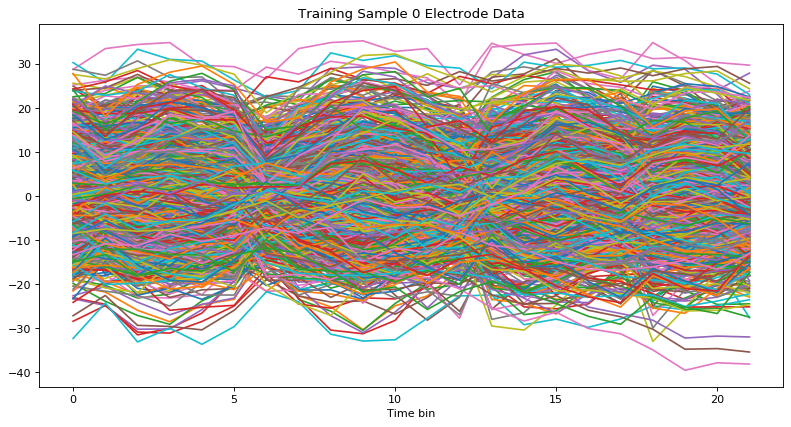

In [0]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

ax.plot(X_train_valid[0], label='Training Sample 0')
ax.set_title('Training Sample 0 Electrode Data')
plt.xlabel('Time bin')
plt.show()

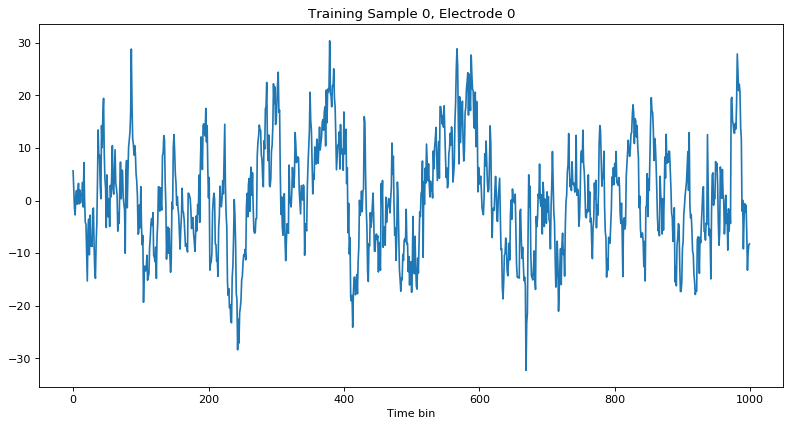

In [0]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

ax.plot(X_train_valid[0][0], label='Training Sample 0, Electrode {}'.format(0))

ax.set_title('Training Sample 0, Electrode 0')
plt.xlabel('Time bin')
# plt.legend(loc='lower left')
plt.show()

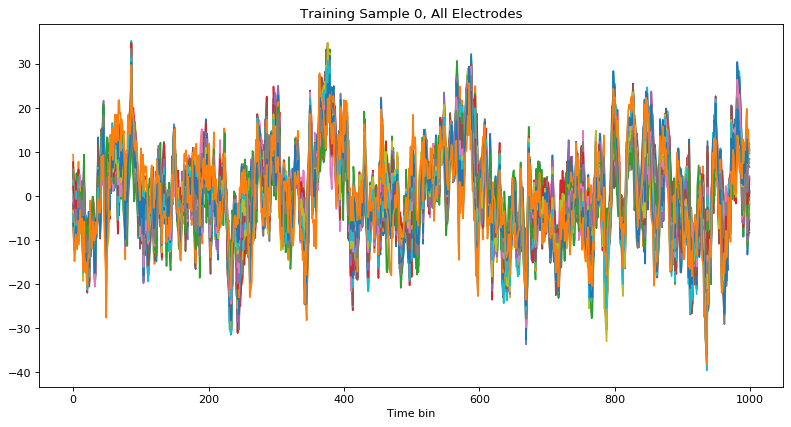

In [0]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

_,num_elec, _ = X_train_valid.shape

for i in range(num_elec):
  ax.plot(X_train_valid[0][i], label='Training Sample 0, Electrode {}'.format(i))

ax.set_title('Training Sample 0, All Electrodes')
plt.xlabel('Time bin')
# plt.legend(loc='lower left')
plt.show()

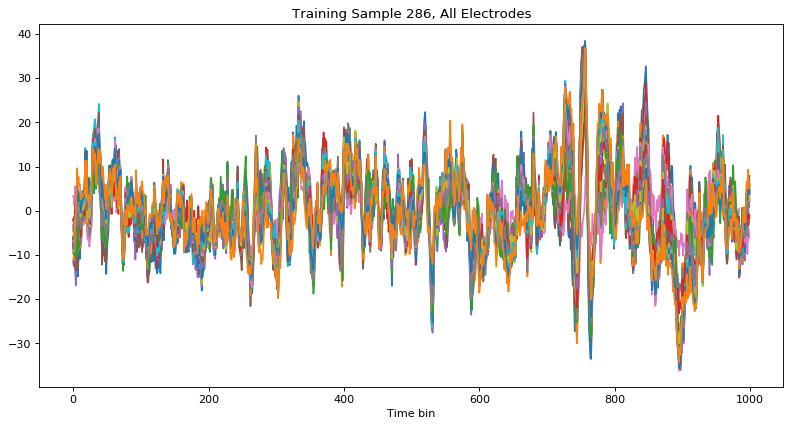

In [0]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

_,num_elec, _ = X_train_valid.shape

for i in range(num_elec):
  ax.plot(X_train_valid[286][i], label='Training Sample 0, Electrode {}'.format(i))

ax.set_title('Training Sample 286, All Electrodes')
plt.xlabel('Time bin')
# plt.legend(loc='lower left')
plt.show()

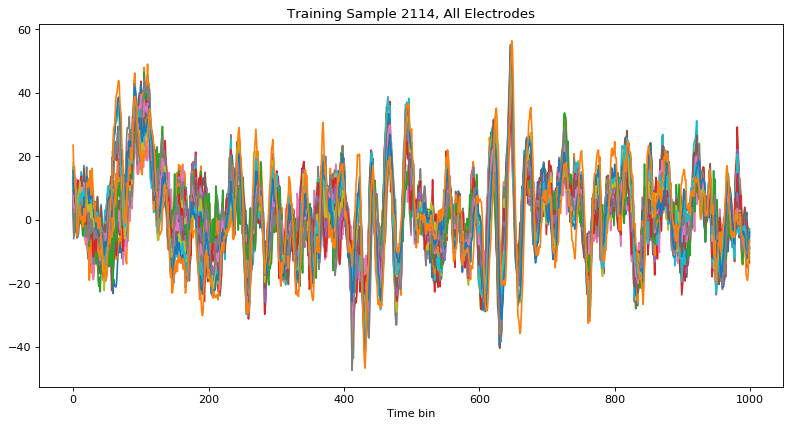

In [0]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

_,num_elec, _ = X_train_valid.shape

for i in range(num_elec):
  ax.plot(X_train_valid[2114][i], label='Training Sample 2114, Electrode {}'.format(i))

ax.set_title('Training Sample 2114, All Electrodes')
plt.xlabel('Time bin')
# plt.legend(loc='lower left')
plt.show()

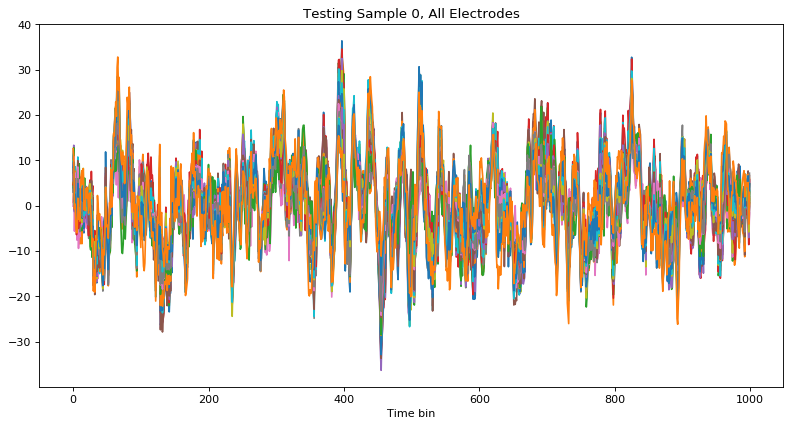

In [0]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

_,num_elec, _ = X_test.shape

for i in range(num_elec):
  ax.plot(X_test[0][i], label='Testing Sample 0, Electrode {}'.format(i))

ax.set_title('Testing Sample 0, All Electrodes')
plt.xlabel('Time bin')
# plt.legend(loc='lower left')
plt.show()

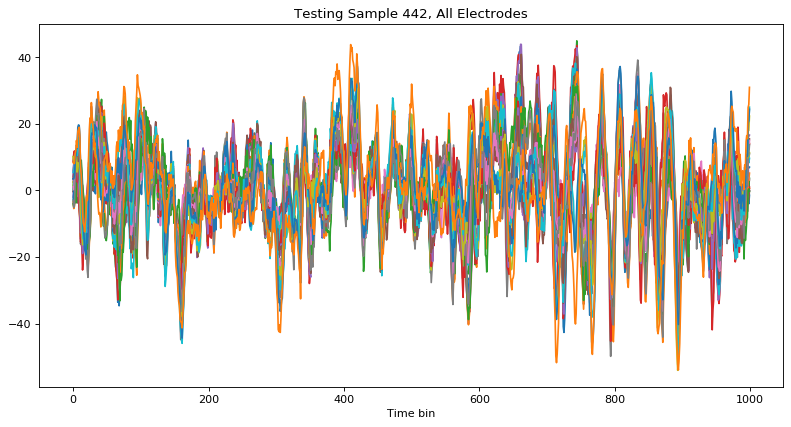

In [0]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

_,num_elec, _ = X_test.shape

for i in range(num_elec):
  ax.plot(X_test[442,i], label='Testing Sample 442, Electrode {}'.format(i))

ax.set_title('Testing Sample 442, All Electrodes')
plt.xlabel('Time bin')
# plt.legend(loc='lower left')
plt.show()

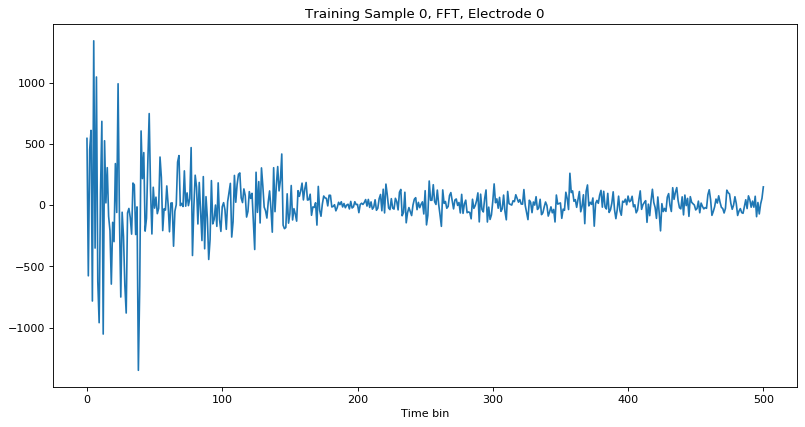

In [0]:
# Try the FFT
X_train_fft = np.fft.rfft(X_train_valid)

import warnings
with warnings.catch_warnings():
  warnings.filterwarnings("ignore")
  fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

  ax.plot(X_train_fft[0][0], label='Training Sample 0, FFT, Electrode {}'.format(0))

  ax.set_title('Training Sample 0, FFT, Electrode 0')
  plt.xlabel('Time bin')
  # plt.legend(loc='lower left')
  plt.show()


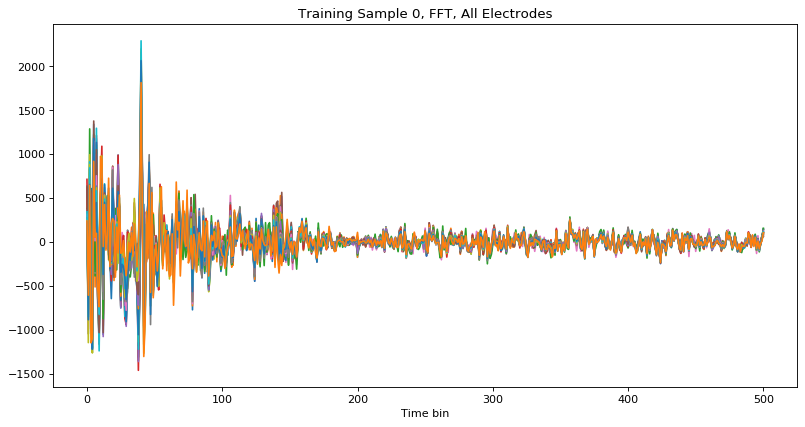

In [0]:
import warnings
with warnings.catch_warnings():
  warnings.filterwarnings("ignore")

  fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

  _, num_elec, _ = X_train_fft.shape

  for i in range(num_elec):
    ax.plot(X_train_fft[0][i], label='Training Sample 0, FFT, Electrode {}'.format(i))

  ax.set_title('Training Sample 0, FFT, All Electrodes')
  plt.xlabel('Time bin')
  # plt.legend(loc='lower left')
  plt.show()

### Let's Learn!

In [0]:
import torch
import torch.nn as nn

### RNN Example

In [0]:
rnn = nn.RNN(10, 20, 2) # input size, hidden size, number of layers
input = torch.randn(5, 3, 10) # (seq_len, batch, input_size)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [7]:
print(hn.size())

torch.Size([2, 3, 20])


### Loading the EEG Data

In [0]:
from torch.utils.data import Dataset, DataLoader

In [0]:
# Dataset Loader Helper Functions

class EEG_Dataset(Dataset):
    def __init__ (self, mode='train'):
        if mode == 'train':
            self.eeg_seq = np.load(dataset_path + 'X_train_valid.npy')
            label = np.load(dataset_path + 'y_train_valid.npy')
            self.person_id = np.load(dataset_path + 'person_train_valid.npy')
        else:
            self.eeg_seq = np.load(dataset_path + 'X_test.npy')
            label = np.load(dataset_path + 'y_test.npy')
            self.person_id = np.load(dataset_path + 'person_test.npy')
        self.label = label - 769 

    def __len__(self):
        return ((self.eeg_seq).shape[0])
    
    def __getitem__(self, idx):
        eeg_seq = torch.from_numpy(self.eeg_seq[idx,:,:]).float()
        label = torch.tensor(self.label[idx]).long()
        person_id = torch.from_numpy(self.person_id[idx,:]).long()     
        sample = {'eeg_seq': eeg_seq, 'label': label, 'person_id': person_id}

        return sample

In [10]:
# Initialize Datasets
EEG_trainset = EEG_Dataset(mode='train')
EEG_trainloader = DataLoader(EEG_trainset, batch_size=128, shuffle=True)
EEG_testset = EEG_Dataset(mode='test')
EEG_testloader = DataLoader(EEG_testset, batch_size=128, shuffle=True)

for idx, batch in enumerate(EEG_trainloader):
    print (idx)
    # Change the order to be (seq_len, batch, input_size)
    eeg_seq = batch['eeg_seq'].permute(2,0,1) 
    print (eeg_seq.size())
    print (batch['label'].size())
    # print (batch['person_id'])

0
torch.Size([1000, 128, 22])
torch.Size([128])
1
torch.Size([1000, 128, 22])
torch.Size([128])
2
torch.Size([1000, 128, 22])
torch.Size([128])
3
torch.Size([1000, 128, 22])
torch.Size([128])
4
torch.Size([1000, 128, 22])
torch.Size([128])
5
torch.Size([1000, 128, 22])
torch.Size([128])
6
torch.Size([1000, 128, 22])
torch.Size([128])
7
torch.Size([1000, 128, 22])
torch.Size([128])
8
torch.Size([1000, 128, 22])
torch.Size([128])
9
torch.Size([1000, 128, 22])
torch.Size([128])
10
torch.Size([1000, 128, 22])
torch.Size([128])
11
torch.Size([1000, 128, 22])
torch.Size([128])
12
torch.Size([1000, 128, 22])
torch.Size([128])
13
torch.Size([1000, 128, 22])
torch.Size([128])
14
torch.Size([1000, 128, 22])
torch.Size([128])
15
torch.Size([1000, 128, 22])
torch.Size([128])
16
torch.Size([1000, 67, 22])
torch.Size([67])


### Define Basic LSTM Model

In [0]:
class model(nn.Module):
    def __init__(self, input_size, hidden_size, class_num):
        super().__init__()
        self.rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, dropout=0.5)
        
        self.fc = nn.Linear(hidden_size, class_num)

    def forward(self, x):
        _, (hn, cn) = self.rnn(x)
        out = self.fc(torch.squeeze(hn))
        return out

### Set up Device

In [12]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


### Create Datasets

In [0]:
# Create Datasets
EEG_trainset = EEG_Dataset(mode='train')
EEG_trainloader = DataLoader(EEG_trainset, batch_size=128, shuffle=True)
EEG_testset = EEG_Dataset(mode='test')
EEG_testloader = DataLoader(EEG_testset, batch_size=128, shuffle=False)

### Instantiate Model, Loss, and Optimizer

In [14]:
# Model Params
hidden_size = 100
# n_layers = 1

# Model (enable GPU use)
model = model(input_size=22, hidden_size=hidden_size, class_num=4).to(device)

# Define hyperparameters
epoch = 20
learing_rate =0.001

# Define Loss
criterion = nn.CrossEntropyLoss()

# Define Optimzer
optimizer = torch.optim.Adam(model.parameters(), lr=learing_rate)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


### Train Model

#### Josh TODO: Create a train function for ease of use:
(Should take in params, including epoch, lr, model type, number of hidden dim, dataset, etc.)
see ex: https://blog.floydhub.com/gru-with-pytorch/

In [15]:
loss_history = []
for i in range (epoch):
    print('Epoch: {}/{}.............'.format(i+1, epoch), end='\n')
    running_loss = 0.0
    total = 0
    correct = 0
    for idx, batch in enumerate(EEG_trainloader):
        eeg_seq = batch['eeg_seq'].permute(2,0,1).to(device)
        label = batch['label'].to(device)
        optimizer.zero_grad()
        output= model(eeg_seq)
        loss = criterion(output, label)
        running_loss += loss.item()
        loss.backward()                
        optimizer.step()
        pred = torch.argmax(output, dim=1)
        correct += torch.sum(pred == label).item()
        total += label.shape[0]
    loss_history.append(running_loss)
    print ('acc:{:.4f}'.format(correct/total))
    print ('loss:{:.4f}'.format(running_loss), end='\n\n')

Epoch: 1/20.............
acc:0.2378
loss:23.8115

Epoch: 2/20.............
acc:0.3116
loss:23.2612

Epoch: 3/20.............
acc:0.3343
loss:22.9965

Epoch: 4/20.............
acc:0.3754
loss:22.7446

Epoch: 5/20.............
acc:0.3953
loss:22.5311

Epoch: 6/20.............
acc:0.4113
loss:22.2611

Epoch: 7/20.............
acc:0.4241
loss:22.0256

Epoch: 8/20.............
acc:0.4463
loss:21.6397

Epoch: 9/20.............
acc:0.4667
loss:21.3020

Epoch: 10/20.............
acc:0.4846
loss:20.8631

Epoch: 11/20.............
acc:0.5017
loss:20.4331

Epoch: 12/20.............
acc:0.5210
loss:20.0275

Epoch: 13/20.............
acc:0.5494
loss:19.3905

Epoch: 14/20.............
acc:0.5636
loss:18.8622

Epoch: 15/20.............
acc:0.5976
loss:18.1803

Epoch: 16/20.............
acc:0.6255
loss:17.4745

Epoch: 17/20.............
acc:0.6388
loss:16.7842

Epoch: 18/20.............
acc:0.6695
loss:16.1140

Epoch: 19/20.............
acc:0.6856
loss:15.3692

Epoch: 20/20.............
acc:0.7111
los

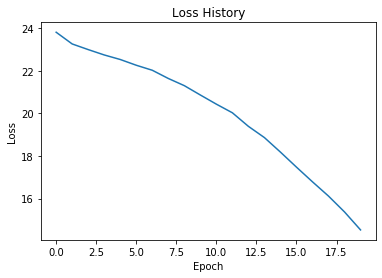

In [16]:
# Plot the Loss

plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Evaluate on Testing Dataset
#### TODO: Create evaluation function

In [17]:
total = 0
correct = 0
for idx, batch in enumerate(EEG_testloader):
    eeg_seq = batch['eeg_seq'].permute(2,0,1).to(device)
    label = batch['label'].to(device)
    output= model(eeg_seq)
    pred = torch.argmax(output, dim=1)
    correct += torch.sum(pred == label).item()
    total += label.shape[0]
print ('acc: {:.4f}'.format(correct/total))

acc: 0.2460


### Define Basic GRU Model

In [0]:
class GRUnet(nn.Module):
    def __init__(self, input_size, hidden_size, class_num):
        super().__init__()
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=1, dropout=0.5)
        
        self.fc = nn.Linear(hidden_size, class_num)

    def forward(self, x):
        _, hn = self.gru(x)
        out = self.fc(torch.squeeze(hn))
        return out

In [25]:
# Model Params
hidden_size = 100
# n_layers = 1

# Model
model = GRUnet(input_size=22, hidden_size=hidden_size, class_num=4).to(device)

# Define hyperparameters
epoch = 20
learing_rate =0.001

# Define Loss
criterion = nn.CrossEntropyLoss()

# Define Optimzer
optimizer = torch.optim.Adam(model.parameters(), lr=learing_rate)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [26]:
loss_history = []
for i in range (epoch):
    print('Epoch: {}/{}.............'.format(i+1, epoch), end='\n')
    running_loss = 0.0
    total = 0
    correct = 0
    for idx, batch in enumerate(EEG_trainloader):
        eeg_seq = batch['eeg_seq'].permute(2,0,1).to(device)
        label = batch['label'].to(device)
        optimizer.zero_grad()
        output= model(eeg_seq)
        loss = criterion(output, label)
        running_loss += loss.item()
        loss.backward()                
        optimizer.step()
        pred = torch.argmax(output, dim=1)
        correct += torch.sum(pred == label).item()
        total += label.shape[0]
    loss_history.append(running_loss)
    print ('acc:{:.4f}'.format(correct/total))
    print ('loss:{:.4f}'.format(running_loss), end='\n\n')

Epoch: 1/20.............
acc:0.2449
loss:23.9879

Epoch: 2/20.............
acc:0.2969
loss:23.3177

Epoch: 3/20.............
acc:0.3343
loss:23.0014

Epoch: 4/20.............
acc:0.3626
loss:22.7692

Epoch: 5/20.............
acc:0.3844
loss:22.5532

Epoch: 6/20.............
acc:0.3995
loss:22.3037

Epoch: 7/20.............
acc:0.4246
loss:22.1173

Epoch: 8/20.............
acc:0.4359
loss:21.8601

Epoch: 9/20.............
acc:0.4515
loss:21.5734

Epoch: 10/20.............
acc:0.4794
loss:21.2326

Epoch: 11/20.............
acc:0.4799
loss:20.9313

Epoch: 12/20.............
acc:0.4983
loss:20.6271

Epoch: 13/20.............
acc:0.5229
loss:20.2720

Epoch: 14/20.............
acc:0.5400
loss:19.7855

Epoch: 15/20.............
acc:0.5489
loss:19.5015

Epoch: 16/20.............
acc:0.5721
loss:18.9511

Epoch: 17/20.............
acc:0.5957
loss:18.4153

Epoch: 18/20.............
acc:0.5995
loss:17.9494

Epoch: 19/20.............
acc:0.6033
loss:17.5251

Epoch: 20/20.............
acc:0.6303
los

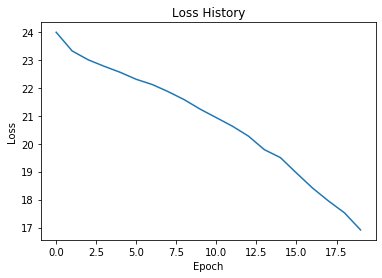

In [27]:
# Plot the Loss

plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [28]:
total = 0
correct = 0
for idx, batch in enumerate(EEG_testloader):
    eeg_seq = batch['eeg_seq'].permute(2,0,1).to(device)
    label = batch['label'].to(device)
    output= model(eeg_seq)
    pred = torch.argmax(output, dim=1)
    correct += torch.sum(pred == label).item()
    total += label.shape[0]
print ('acc: {:.4f}'.format(correct/total))

acc: 0.2573
